In [1]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pymorphy2
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')

morph = pymorphy2.MorphAnalyzer()

def lemmatize_words(words):
    return [morph.parse(word)[0].normal_form for word in words]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('russian')]
    words = lemmatize_words(words)
    return words

# Загрузка данных из CSV файла
df = pd.read_csv('all_recipes.csv')

# Преобразование данных
df['LIST_INGRID_LEM'] = df['INGREDIENTS'].apply(lambda x: ' '.join(preprocess_text(x)))

# Сохранение изменений обратно в CSV файл 
df.to_csv('all_recipes_updated.csv', index=False)

sample_text = "100 грамм яблок, 30г сахара и 50 грамм муки"
processed_sample = preprocess_text(sample_text)
print(processed_sample)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\story\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\story\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['грамм', 'яблоко', 'г', 'сахар', 'грамм', 'мука']


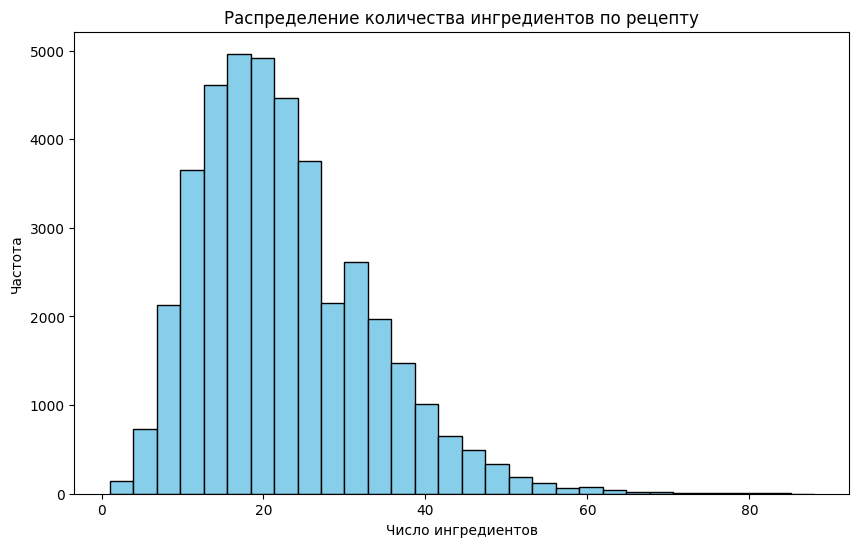

In [28]:
import matplotlib.pyplot as plt  # Импортируем библиотеку для создания графиков

# Добавляем новый столбец в DataFrame, где считаем количество ингредиентов в каждом рецепте
df['num_ingredients'] = df['LIST_INGRID_LEM'].apply(lambda x: len(x.split()))

# Настраиваем размер будущего графика
plt.figure(figsize=(10, 6))

# Создаем гистограмму для распределения количества ингредиентов в рецептах
plt.hist(df['num_ingredients'], bins=30, color='skyblue', edgecolor='black')

# Добавляем заголовок и подписи к осям
plt.title('Распределение количества ингредиентов по рецепту')
plt.xlabel('Число ингредиентов')
plt.ylabel('Частота')

# Показываем график
plt.show()


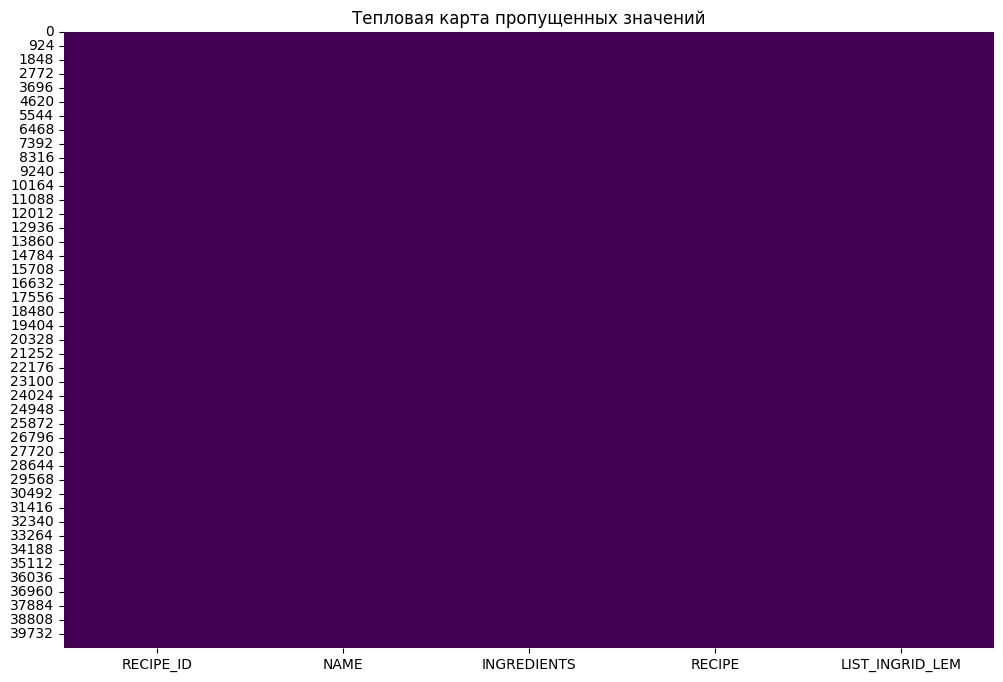

In [29]:
import pandas as pd  # Импортируем библиотеку для работы с табличными данными
import seaborn as sns  # Импортируем библиотеку для создания красивых графиков
import matplotlib.pyplot as plt  # Импортируем библиотеку для создания графиков

# Загрузка данных из CSV файла
df = pd.read_csv('all_recipes_updated.csv')

# Настраиваем размер будущего графика
plt.figure(figsize=(12, 8))

# Создаем тепловую карту для визуализации пропущенных значений в данных
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

# Добавляем заголовок к графику
plt.title('Тепловая карта пропущенных значений')

# Показываем график
plt.show()

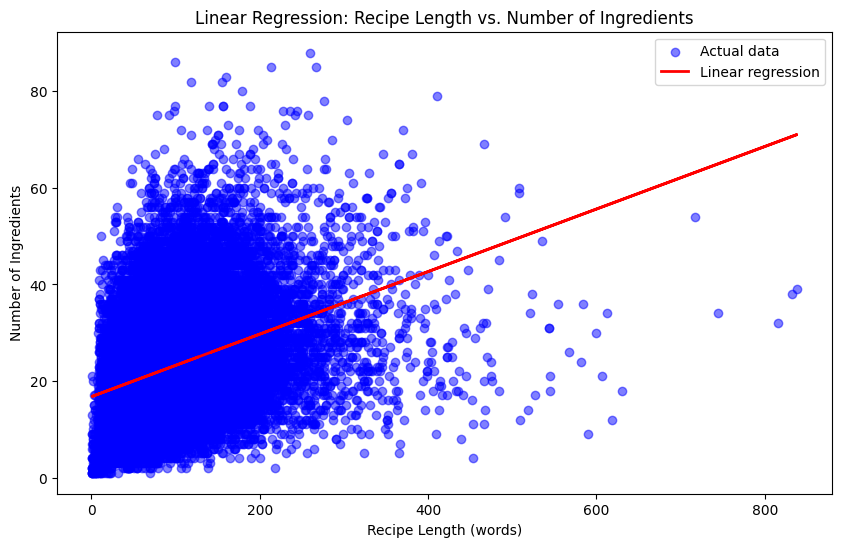

Number of outliers: 358
                                                    NAME  recipe_length  \
359                                      Ферганский плов            484   
452                                            Зур-бэлиш            619   
1218               Домашние пельмени со смешенным фаршем            453   
1842                                      Курник с мясом            413   
2805   Курица, запеченная с апельсинами, в горчичном ...            365   
...                                                  ...            ...   
40579                            Суп в марсельском стиле            135   
40601                              Паштет из дикой птицы             78   
40624   Праздничный пунш из цитрусовых , рома и амаретто             72   
40651                           Морковный торт Starbucks            143   
40653          Пряный морковный торт со сметанным кремом            126   

       num_ingredients  
359                 18  
452                 12  


In [8]:
import pandas as pd  # Импортируем библиотеку для работы с табличными данными
import numpy as np  # Импортируем библиотеку для работы с массивами и математическими функциями
from sklearn.linear_model import LinearRegression  # Импортируем класс линейной регрессии из библиотеки sklearn
import matplotlib.pyplot as plt  # Импортируем библиотеку для создания графиков

# Загрузка данных из CSV файла
df = pd.read_csv('all_recipes_updated.csv')

# Функция для вычисления длины рецепта и количества ингредиентов
def calculate_lengths(df):
    # Добавляем столбец с длиной рецепта (количество слов в рецепте)
    df['recipe_length'] = df['RECIPE'].apply(lambda x: len(x.split()))
    # Добавляем столбец с количеством ингредиентов (количество слов в списке ингредиентов)
    df['num_ingredients'] = df['LIST_INGRID_LEM'].apply(lambda x: len(x.split()))
    return df

# Вычисляем длину рецепта и количество ингредиентов, используя функцию
df = calculate_lengths(df)

# Линейная регрессия
X = df['recipe_length'].values.reshape(-1, 1)  # Преобразуем данные для длины рецепта в формат подходящий для модели
y = df['num_ingredients'].values.reshape(-1, 1)  # Преобразуем данные для количества ингредиентов в формат подходящий для модели
reg = LinearRegression().fit(X, y)  # Создаем и обучаем модель линейной регрессии
predictions = reg.predict(X)  # Предсказываем значения на основе модели

# Визуализация линейной регрессии
plt.figure(figsize=(10, 6))  # Настраиваем размер графика
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual data')  # Рисуем точки данных
plt.plot(X, predictions, color='red', linewidth=2, label='Linear regression')  # Рисуем линию линейной регрессии
plt.title('Linear Regression: Recipe Length vs. Number of Ingredients')  # Добавляем заголовок к графику
plt.xlabel('Recipe Length (words)')  # Подписываем ось X
plt.ylabel('Number of Ingredients')  # Подписываем ось Y
plt.legend()  # Добавляем легенду
plt.show()  # Показываем график

# Выявление выбросов
residuals = y - predictions  # Вычисляем остатки (разница между реальными и предсказанными значениями)
outliers = df[np.abs(residuals) > 3 * np.std(residuals)]  # Определяем выбросы как точки, где остатки больше трех стандартных отклонений

# Выводим количество выбросов и их данные
print("Number of outliers:", len(outliers))
print(outliers[['NAME', 'recipe_length', 'num_ingredients']])


In [30]:
import pandas as pd  # Импортируем библиотеку для работы с табличными данными

# Загрузка данных из CSV файла
df = pd.read_csv('all_recipes_updated.csv')

# Проверка на наличие дубликатов по определенным столбцам ('NAME', 'INGREDIENTS', 'RECIPE')
duplicates = df[df.duplicated(subset=['NAME', 'INGREDIENTS', 'RECIPE'])]

# Выводим количество дубликатов
print("Количество дубликатов:", len(duplicates))

# Выводим сами дубликаты
print(duplicates)


Количество дубликатов: 1922
       RECIPE_ID                                               NAME  \
25            74                                 Котлеты по‑киевски   
131          286                                Белуга по‑английски   
260          604        Куриные кусочки в апельсиновом соусе с чили   
398         1105               Рыба, приготовленная в винном наваре   
435         1014                Куриные окорочка на сковороде гриль   
...          ...                                                ...   
40578      22826                           Яблочные слойки с изюмом   
40594      33983                     Тажин с курицей и сухофруктами   
40634      21145                            Суп из спелых помидоров   
40641       3845  Коми-пермяцкий салат с солониной из лосятины...   
40650      33710                 Роллы с сыром филадельфия и семгой   

                                             INGREDIENTS  \
25     Куриное филе Панировочные сухари панко Чеснок ...   

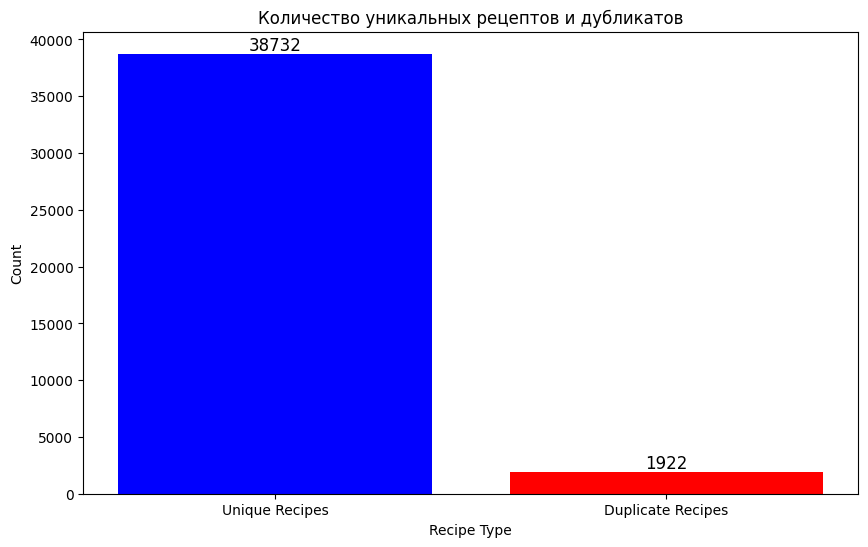

In [32]:
import pandas as pd  # Импортируем библиотеку для работы с табличными данными
import matplotlib.pyplot as plt  # Импортируем библиотеку для создания графиков

# Загрузка данных из CSV файла
df = pd.read_csv('all_recipes_updated.csv')

# Проверка на наличие дубликатов по определенным столбцам ('NAME', 'INGREDIENTS', 'RECIPE')
duplicates = df[df.duplicated(subset=['NAME', 'INGREDIENTS', 'RECIPE'])]

# Подсчет количества дубликатов
num_duplicates = len(duplicates)

# Подсчет количества уникальных записей (всего записей минус количество дубликатов)
num_unique = len(df) - num_duplicates

# Создание бар-графика
plt.figure(figsize=(10, 6))  # Настраиваем размер графика
labels = ['Unique Recipes', 'Duplicate Recipes']  # Метки для столбцов
counts = [num_unique, num_duplicates]  # Значения для столбцов

bars = plt.bar(labels, counts, color=['blue', 'red'])  # Рисуем столбчатую диаграмму

# Добавление аннотаций с количеством на каждый столбец
for bar in bars:
    height = bar.get_height()  # Получаем высоту столбца
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Позиционируем текст по оси X
        height,  # Позиционируем текст по оси Y
        f'{height}',  # Текст аннотации (высота столбца)
        ha='center',  # Горизонтальное выравнивание текста по центру
        va='bottom',  # Вертикальное выравнивание текста по нижнему краю
        fontsize=12  # Размер шрифта
    )

# Подписываем оси и добавляем заголовок
plt.xlabel('Recipe Type')
plt.ylabel('Count')
plt.title('Количество уникальных рецептов и дубликатов')

# Показываем график
plt.show()



In [34]:
import pandas as pd  # Импортируем библиотеку для работы с табличными данными
from sklearn.cluster import DBSCAN  # Импортируем алгоритм кластеризации DBSCAN из sklearn
from sklearn.preprocessing import StandardScaler  # Импортируем класс StandardScaler для масштабирования данных
import matplotlib.pyplot as plt  # Импортируем библиотеку для создания графиков

# Загрузка данных из CSV файла
df = pd.read_csv('all_recipes_updated.csv')

# Создание признаков для анализа
df['NAME_length'] = df['NAME'].apply(lambda x: len(x.split()))  # Добавляем столбец с длиной названия в словах

# Выявление подозрительных названий на основе длины названия
suspicious_names = df[df['NAME_length'] > 14]  # Фильтруем рецепты, названия которых длиннее 14 слов
print("Подозрительные названия по длине до обработки:")
print(suspicious_names[['NAME', 'NAME_length']])  # Выводим подозрительные названия и их длину

# Пример для выявления некорректных названий на основе ключевых слов
keywords = ['добавить', 'варить', 'обжарить', 'перемешать', 'выложить']  # Слова, нехарактерные для названий рецептов

# Функция для проверки наличия подозрительных ключевых слов в названии
def contains_suspicious_keywords(name):
    return any(keyword in name.lower() for keyword in keywords)

# Выявление подозрительных названий на основе ключевых слов
suspicious_names_keywords = df[df['NAME'].apply(contains_suspicious_keywords)]
print("Подозрительные названия по ключевым словам до обработки:")
print(suspicious_names_keywords[['NAME']])  # Выводим подозрительные названия


Подозрительные названия по длине до обработки:
                                                    NAME  NAME_length
249     так что часть можно заморозить.7. Отваривать ...           19
1019   5 мм) выложить фарш и сформировать равиоли.2. ...           19
2203    что с одной сторны центральной кости. Для раз...           15
2643    глиняную или керамическую).7. После того как ...           15
5976    а чеснок — тонкими пластинами.3. Разогрейте в...           17
7810    так же нарезать кубиком.2. Куриную грудку отв...           18
9592    смешивать в течение 4 минут на низкой скорос...           17
9688    раскатать скалкой до овала. Толщина теста дол...           18
10271   взбивать еще несколько минут — масса должна с...           16
11551   уберите утяжелитель и бумагу и пеките еще 20 ...           18
12420  сахар и ванильный сахар положить в миску и взб...           19
12998  Тартар из форели с сальсой из огурца, укропа и...           16
18534  Тартар из лосося с кремом из козьего